# 1 - traitement et analyse exploratoire des données
---

**Import des dépendances et des données**

In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename_path = 'data/2015-building-energy-benchmarking.csv'
data_2015 = pd.read_csv(filename_path)

filename_path = 'data/2016-building-energy-benchmarking.csv'
data_2016 = pd.read_csv(filename_path)

**Import des fonctions**

In [2]:
####
#Retourne une serie comportant le pourcentage de valeurs manquantes pour chaques colonnes du dataframe
def percentage_nan_by_columns(df):
    s = df.isnull().sum(axis = 0) / df.shape[0] * 100.00
    s = s.sort_values()
    s = s.transform(lambda x: '{:02.2f}'.format(x)+' %')
    return s

**Paramètres divers**

In [3]:
pd.set_option('display.max_columns', 47)

**Observer les données**

**2015**
- variables cibles : ['SiteEnergyUseWN(kBtu)'	, 'GHGEmissions(MetricTonsCO2e)']
- lignes, colonnes : (3340, 47)
- types de variables :
(float64,23) ,
(object,15),
(int64,9)
- valeurs manquantes : >50 %   
['SecondLargestPropertyUseType',   
'SecondLargestPropertyUseTypeGFA',   
'ThirdLargestPropertyUseType',   
'ThirdLargestPropertyUseTypeGFA',   
'2010 Census Tracts',   
'City Council Districts',   
'YearsENERGYSTARCertified',   
'Outlier',    
'Comment'   ]

**2016**
- variables cibles : SiteEnergyUseWN(kBtu)	, TotalGHGEmissions
- lignes, colonnes : (3376, 46)
- types de variables :
(float64,22) ,
(object,15),
(int64,8),
(bool,1)
- valeurs manquantes :  >50 %   
['SecondLargestPropertyUseTypeGFA',   
'SecondLargestPropertyUseType',   
'ThirdLargestPropertyUseTypeGFA',   
'ThirdLargestPropertyUseType',           
'YearsENERGYSTARCertified',   
'Outlier',   
Comments']   

In [4]:
df15 = data_2015.copy()
df16 = data_2016.copy()

In [5]:
print(df15.shape)
print(df16.shape)

(3340, 47)
(3376, 46)


In [6]:
print(df15.dtypes.value_counts())
print(df16.dtypes.value_counts())

float64    23
object     15
int64       9
dtype: int64
float64    22
object     15
int64       8
bool        1
dtype: int64


In [7]:
df15.sample(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
1172,21125,2015,NonResidential,Small- and Mid-Sized Office,THE PECK BUILDING,1972202940,"{'latitude': '47.65105661', 'longitude': '-122...",6,LAKE UNION,2001,1,5.0,33740,6010,27730,"Office, Parking, Retail Store",Office,15908.0,Retail Store,8762.0,Parking,1500.0,NaN,68.0,56.9,56.9,178.8,178.8,1404467.0,1404467.0,0.0,411626.0,1404525.0,0.0,0.0,0.0,9.79,0.11,No,NaN,Compliant,NaN,NaN,20.0,NaN,2.0,18377
1332,21520,2015,NonResidential,Small- and Mid-Sized Office,DESIGN SERVICE BLDG,2025049040,"{'latitude': '47.63613246', 'longitude': '-122...",4,LAKE UNION,1964,1,5.0,54465,9605,44860,"Office, Parking",Office,57972.0,Parking,0.0,NaN,NaN,NaN,68.0,64.2,65.6,183.4,182.6,3721129.0,3804232.0,0.0,943129.0,3218088.0,5032.0,503174.0,0.0,49.16,0.65,No,NaN,Compliant,NaN,NaN,17.0,NaN,10.0,18376
2176,24607,2015,Multifamily LR (1-4),Low-Rise Multifamily,CALIFORNIA PLACE,8010100300,"{'latitude': '47.5782716', 'longitude': '-122....",1,SOUTHWEST,1990,1,4.0,33084,0,33084,Multifamily Housing,Multifamily Housing,33084.0,NaN,NaN,NaN,NaN,NaN,29.0,34.9,38.3,109.7,120.2,1156251.0,1266387.0,0.0,338878.0,1156299.0,0.0,0.0,0.0,8.06,0.09,Yes,NaN,Compliant,NaN,NaN,41.0,NaN,49.0,18795


In [8]:
df16.sample(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1723,23222,2016,Multifamily LR (1-4),Low-Rise Multifamily,SAN JUAN,4840 California Ave SW,Seattle,WA,98116.0,7579201085,1,SOUTHWEST,47.55801,-122.38651,1958,1.0,3,29811,6258,23553,"Multifamily Housing, Parking",Multifamily Housing,23553.0,Parking,6258.0,NaN,NaN,NaN,69.0,30.600000,32.400002,96.199997,101.900002,721549.625,764063.625,0.0,2.114741e+05,721550.0,0.0,0.0,False,NaN,Compliant,NaN,5.03,0.17
2738,26761,2016,NonResidential,Small- and Mid-Sized Office,North Lake Office Bldg.,100 NE Northlake Way,Seattle,WA,98105.0,4206900485,4,LAKE UNION,47.65373,-122.32721,2007,1.0,3,44510,18228,26282,"Office, Parking",Office,26282.0,Parking,18228.0,NaN,NaN,NaN,23.0,83.300003,85.599998,261.399994,268.899994,2188051.250,2250450.500,0.0,6.412810e+05,2188051.0,0.0,0.0,False,NaN,Compliant,NaN,15.25,0.34
2936,27584,2016,Multifamily HR (10+),High-Rise Multifamily,Meridian Manor Apartments,10345 Meridian Ave N,Seattle,WA,98133.0,5464300020,5,NORTHWEST,47.70451,-122.33453,1979,1.0,10,75070,0,75070,Multifamily Housing,Multifamily Housing,75070.0,NaN,NaN,NaN,NaN,NaN,18.0,50.599998,53.200001,158.800003,167.000000,3796986.500,3992223.500,0.0,1.112833e+06,3796986.0,0.0,0.0,False,NaN,Compliant,NaN,26.47,0.35


In [9]:
print(df15.columns)
print(df16.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

On affiche les colonnes qui sont exclusives l'un pour l'autre.

In [10]:
for col in df15.columns:
    if col not in df16.columns:
        print(col)

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


In [11]:
for col in df16.columns:
    if col not in df15.columns:
        print(col)

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


On récupere à l'aide du fichier JSON les méta-données pour trouver nos valeurs cibles

In [12]:
with open('data/socrata_metadata_2015-building-energy-benchmarking.json') as f:
  dict_json = json.load(f)

#print(json.dumps(filejson, indent = 4, sort_keys=True))

for d in dict_json['columns']:
    if 'fieldName' in d:
        print(f" column_name : {d['fieldName'][:100]}")
        if 'description' in d:
            print(f" description : {d['description'][:150]} \n")

 column_name : seattlebuildingid
 description : A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes. 

 column_name : datayear
 column_name : buildingtype
 description : City of Seattle building type classification. 

 column_name : primarypropertytype
 description : The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is 

 column_name : propertyname
 description : Official or common property name. 

 column_name : taxparcelidentificationnumber
 description : 	
Property King County PIN 

 column_name : location
 column_name : councildistrictcode
 description : Property City of Seattle council district. 

 column_name : neighborhood
 column_name : yearbuilt
 description : Year in which a property was constructed or underwent a complete renovation. 

 column_name : numberofbuildings
 column_name : numberoffloors
 

**Identification des valeurs manquantes**

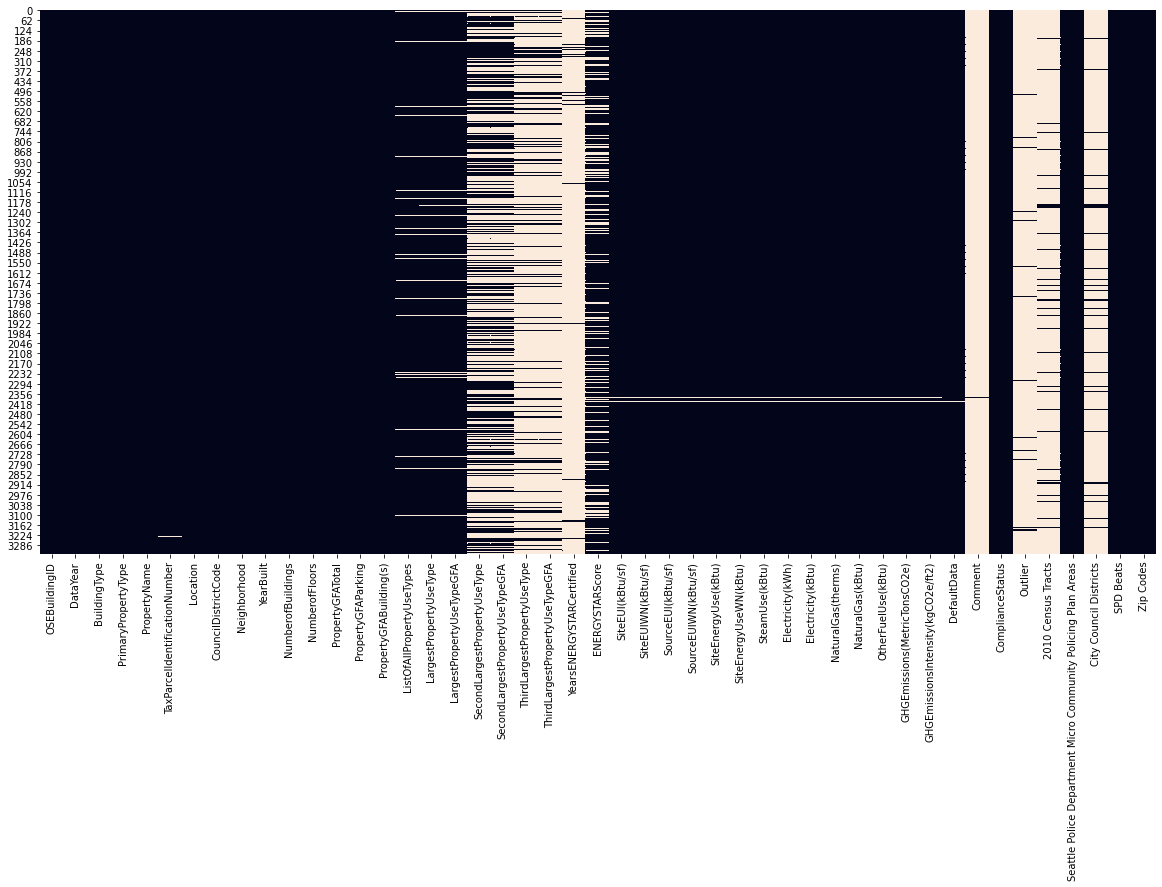

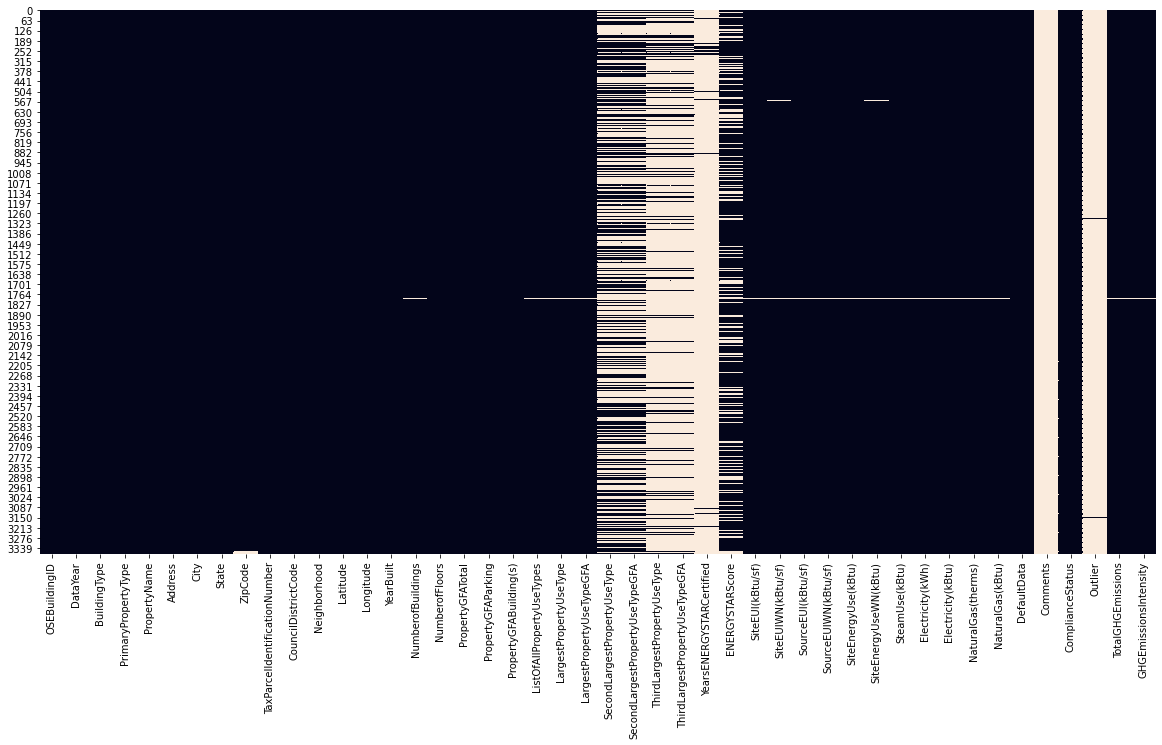

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df15.isna(), cbar=False)
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(df16.isna(),cbar=False)
plt.show()

In [14]:
percentage_nan_by_columns(df15)

OSEBuildingID                                                     0.00 %
ComplianceStatus                                                  0.00 %
PropertyGFABuilding(s)                                            0.00 %
PropertyGFAParking                                                0.00 %
PropertyGFATotal                                                  0.00 %
NumberofBuildings                                                 0.00 %
YearBuilt                                                         0.00 %
Neighborhood                                                      0.00 %
Zip Codes                                                         0.00 %
Location                                                          0.00 %
PropertyName                                                      0.00 %
PrimaryPropertyType                                               0.00 %
BuildingType                                                      0.00 %
DataYear                                           

In [15]:
percentage_nan_by_columns(df16)

OSEBuildingID                        0.00 %
PropertyGFABuilding(s)               0.00 %
PropertyGFAParking                   0.00 %
PropertyGFATotal                     0.00 %
NumberofFloors                       0.00 %
YearBuilt                            0.00 %
Longitude                            0.00 %
Latitude                             0.00 %
Neighborhood                         0.00 %
DefaultData                          0.00 %
CouncilDistrictCode                  0.00 %
ComplianceStatus                     0.00 %
State                                0.00 %
City                                 0.00 %
Address                              0.00 %
PropertyName                         0.00 %
PrimaryPropertyType                  0.00 %
BuildingType                         0.00 %
DataYear                             0.00 %
TaxParcelIdentificationNumber        0.00 %
SiteEnergyUse(kBtu)                  0.15 %
SiteEnergyUseWN(kBtu)                0.18 %
SiteEUIWN(kBtu/sf)              

**import fonctions pour exploration**

In [19]:
from math import ceil,sqrt,floor,pow


from scipy.stats import kruskal
from wordcloud import WordCloud
from PIL import Image

#Retourne un nombre x  de couleurs avec un espacement homogene contenus dans une colormap
def get_colors_from_listedcolormap(colormap, x):
    colors = []
    for i in range(0,x):
        if x <2:
            y=1
        else:
            y=i/(x-1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N-1)*y)])
    return colors

#Retourne l'ensemble des labels du dataframe pour un certain dtype
def get_set_of_labels(dataframe,dtype):
    return {index for index, value in dataframe.dtypes.items() if value == dtype}

#Genere une grille carrée d'histogramme pour chaque variables de type dtype
def plot_sghisto(dataframe, dtype, color='', max_items=100, labels=[], title=''):        
    if not labels:
        if dtype == 'all':
            labels = dataframe.columns.values
        elif dtype == 'numbers':
            labels = get_set_of_labels(dataframe, 'float64')
            labels = labels.union(get_set_of_labels(dataframe, 'int64'))
        else:
            labels = get_set_of_labels(dataframe, dtype)
            
    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension,2))
    fig, axs = plt.subplots(dimension, dimension,figsize=(30,30))
    fig.suptitle(title, fontsize=32 , x=0.5,y=0.95)
    
    for i, value in enumerate(labels, start=0):
            x = floor(i/dimension)
            y = i - x*dimension
            if dataframe[value].dtype == 'object':
                df_index = dataframe[value].value_counts().index[:max_items]
                df_temp = dataframe[dataframe[value].isin(df_index.values)]
                sns.histplot(data=df_temp, x=value,color=color, discrete=True,ax=axs[x,y])
                ax= axs[x,y]
                ax.set_xticklabels([])
            if dataframe[value].dtype =='float64' or dataframe[value].dtype =='int64':
                sns.histplot(data=dataframe, x=value, color=color, ax= axs[x,y])
            ax= axs[x,y]
            ax.set_xlabel(f'{value[0:15]}', fontdict={'fontsize':18})
            ax.set_ylabel('')
            
    if dimension2 > labels_length:
        for i in range(labels_length,dimension2):
            x = floor(i/dimension)
            y = i - x*dimension
            axs[x,y].remove()

#fonction utile a wordcloud pour transformer un png en mask        
def transform_png_to_mask(path):
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    png = np.array(Image.open(path))
    transformed_png = np.ndarray((png.shape[0],png.shape[1]), np.int32)

    for i in range(len(png)):
        transformed_png[i] = list(map(transform_format, transformed_png[i]))
    
    return transformed_png

#Genere un wordcloud pour chaque labels, par defaut genere toutes les colonnes de dtype = object
def plot_wordcloud(dataframe, cmap, labels=[],title=''):        
    if not labels:
        labels = get_set_of_labels(dataframe,'object')
        
    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension,2))
    fig, axs = plt.subplots(dimension, dimension,figsize=(30,30))
    fig.suptitle(title, fontsize=32 , x=0.5,y=0.95)
    
    for i, value in enumerate(labels, start=0):
            x = floor(i/dimension)
            y = i - x*dimension
            word_freq = dataframe[value].value_counts().to_dict()
            wordcloud = WordCloud(width=500,\
                              height=500,\
                              max_words=100,\
                              background_color="white",\
                              #mask=transform_png_to_mask("nutriscore.png"),\
                              colormap=cmap\
                             ).generate_from_frequencies(word_freq)
            ax= axs[x,y]
            ax.imshow(wordcloud)
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_xlabel(value, fontdict={'fontsize':18})
            
    if dimension2 > labels_length:
        for i in range(labels_length,dimension2):
            x = floor(i/dimension)
            y = i - x*dimension
            axs[x,y].remove()


        
#Effectue un test de kruskal_wallis sur label en fonction de grouplabel avec un seuil alpha
def do_kruskal_test(dataframe,grouplabel,label,alpha):
    groups=[]
    for name in dataframe[grouplabel].value_counts().index:
        groups.append(dataframe[dataframe[grouplabel] == name][label])

    # Comparaison des échantillons
    stat, p = kruskal(*groups)
    print('statistics: {:.3f}, p = {:.3f}'.format(stat, p))
    
    # Décision
    alpha = 0.05
    print('grouplabel: {}, label: {}, alpha: {:.2f}'.format(grouplabel,label,alpha))
    if p > alpha:
        print('resultat: distributions identiques (ne pas rejeter H0)\n')
    else:
        print('resultat: distributions differentes (rejeter H0)\n')
        
#Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP,5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

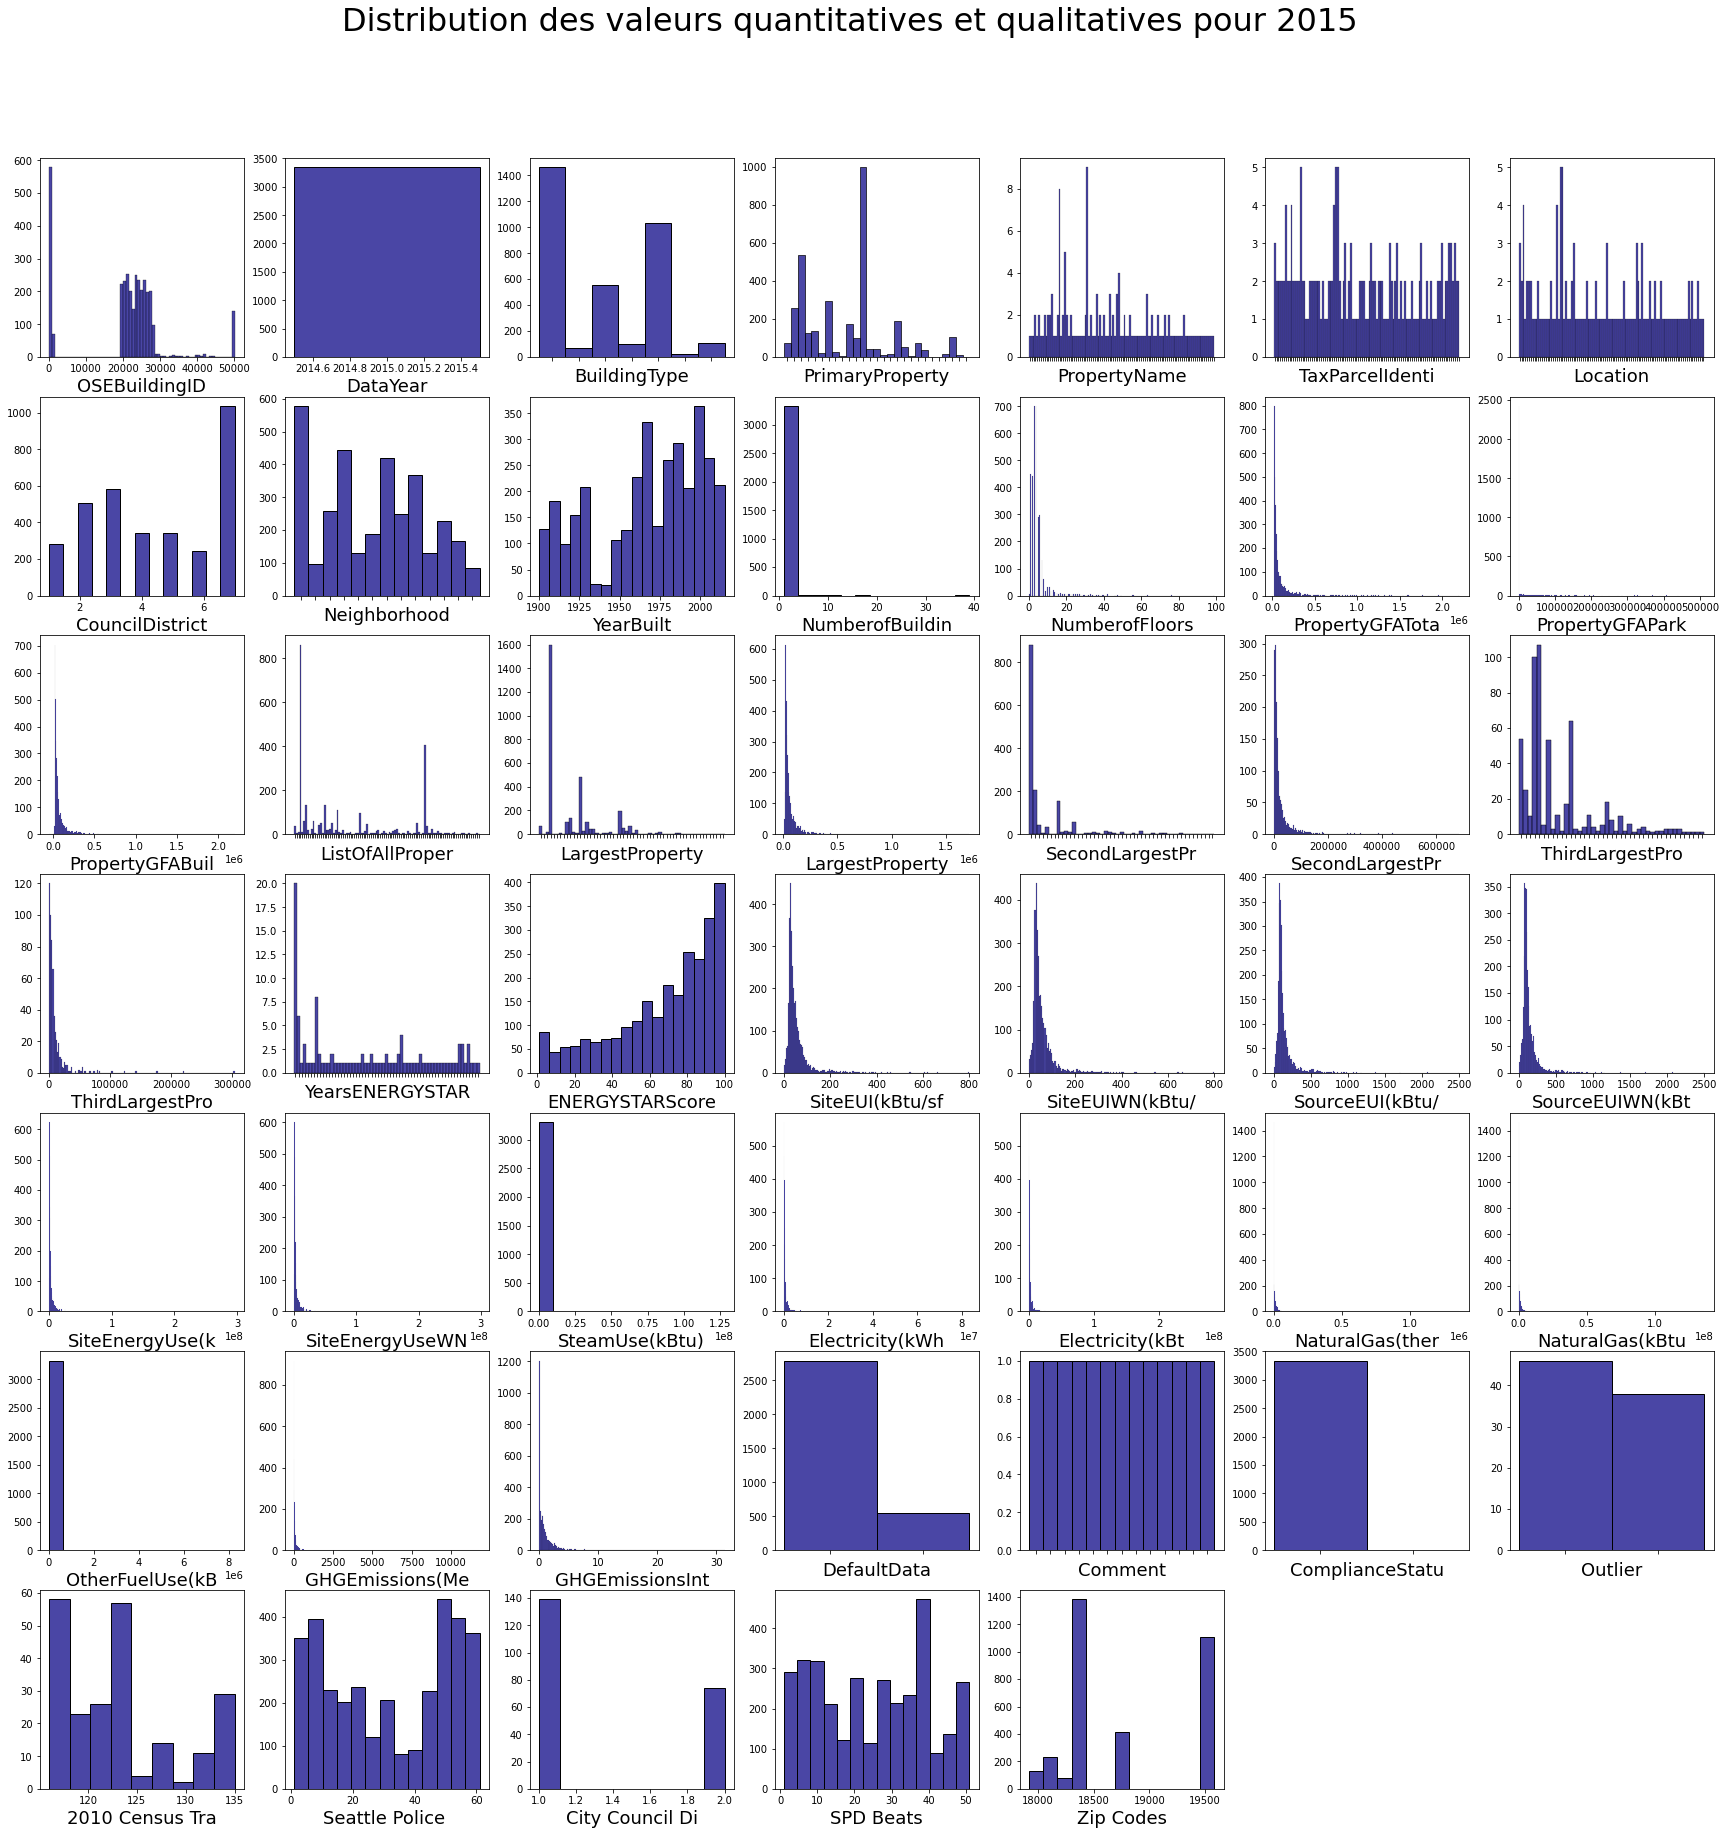

In [20]:
plot_sghisto(df15, dtype='all', title='Distribution des valeurs quantitatives et qualitatives pour 2015', color=COLOR_PRIMARY)

In [ ]:
plot_sghisto(df16, dtype='all', title='Distribution des valeurs quantitatives et qualitatives pour 2016', color=COLOR_SECONDARY)